<a href="https://colab.research.google.com/github/uttkarsh-pr/mypython.py/blob/main/Car_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle

In [2]:
df = pd.read_csv('train.csv')

In [3]:
print(df.head())

           model  year motor_type        running wheel    color   type  \
0         toyota  2022     petrol       3000  km  left  skyblue  sedan   
1  mercedes-benz  2014     petrol     132000  km  left    black  sedan   
2            kia  2018     petrol   95000  miles  left    other  sedan   
3  mercedes-benz  2002     petrol  137000  miles  left   golden  sedan   
4  mercedes-benz  2017     petrol     130000  km  left    black  sedan   

      status  motor_volume  price  
0  excellent           2.0  24500  
1  excellent           2.0  25500  
2  excellent           2.0  11700  
3  excellent           3.2  12000  
4       good           2.0  26000  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1642 non-null   object 
 1   year          1642 non-null   int64  
 2   motor_type    1642 non-null   object 
 3   running       1642 non-null   object 
 4   wheel         1642 non-null   object 
 5   color         1642 non-null   object 
 6   type          1642 non-null   object 
 7   status        1642 non-null   object 
 8   motor_volume  1642 non-null   float64
 9   price         1642 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 128.4+ KB
None


In [5]:
# Check missing values
missing = df.isnull().sum()
print("Missing Values:\n", missing[missing > 0])

Missing Values:
 Series([], dtype: int64)


In [6]:
# Fill numerical missing with median
for col in df.select_dtypes(include=['float64','int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical missing with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify no missing
print(df.isnull().sum().max())

0


/tmp/ipython-input-6-3845260406.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-6-3845260406.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [7]:
if 'year' in df.columns:
    df['car_age'] = 2025 - df['year']

In [8]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [11]:
print(df.columns)

X = df.drop(['price'], axis=1)
y = df['price']

Index(['model', 'year', 'motor_type', 'running', 'wheel', 'color', 'type',
       'status', 'motor_volume', 'price', 'car_age'],
      dtype='object')


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.7193676326031906
MAE: 2013.3820043904084
MSE: 12349897.504265482
RMSE: 3514.242095283915


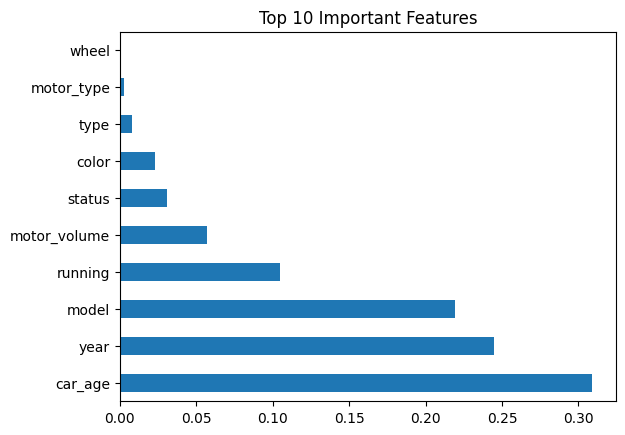

In [15]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()

In [16]:
with open('car_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model Saved Successfully.")


Model Saved Successfully.


In [17]:
import gradio as gr

# Reload model
with open('car_price_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Example input function - customize based on your dataset features
def predict_car_price(brand, model_name, transmission, mileage, engine_power, fuel_type, car_age):
    # Encode categorical inputs as per training encoding
    # For demo purposes, assuming label encoded numerical values are input
    features = np.array([[brand, model_name, transmission, mileage, engine_power, fuel_type, car_age]])
    price = model.predict(features)
    return price[0]

# Build Gradio interface
demo = gr.Interface(
    fn=predict_car_price,
    inputs=[
        gr.Number(label="Brand (encoded)"),
        gr.Number(label="Model Name (encoded)"),
        gr.Number(label="Transmission (encoded)"),
        gr.Number(label="Mileage"),
        gr.Number(label="Engine Power"),
        gr.Number(label="Fuel Type (encoded)"),
        gr.Number(label="Car Age"),
    ],
    outputs="number",
    title="🚗 Car Price Predictor",
    description="Enter encoded features to predict car price."
)

demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://eec1a9e1ce49f0e8b0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
